# Three Observabel Trends Based on this Data

In [251]:
#  1)  Rural drivers accounted for 2.6% of the total drivers but accounted for 6.8% of the total fares and Surburban
#          drivers accounted for 16.5% of the total drivers but accounted for 30.5% of the total fares.  It would indicate
#          that it is much more profitable to be a rural or suburban driver than an urban driver.

#  2)  The demand for rides is greater than the supply of drivers in Rural and Surburban settings.  Rural drivers make up
#          2.6% of the total drivers and account for 5.3% of the total rides and Surburban drivers make up 16.5% of the 
#          total drivers and account for 26.3% of the total rides.  This discrepency in supply vs demand would account for the 
#          higher average fee that is evident in the Pyber Ride Sharing scatter plot graph.

#  3)  Urban drivers account for 80.9% of the total drivers but only account for 68.4% of the total rides.
#          That in addition to having a lower average fare as evident by the scatter plot would be the reasons behind
#          urban drivers only accounting for 62.7% of the total fares.  It would be beneficial for some of the urban
#          drivers to venture out to surburban areas to find rides as there seems to be a shortage of surburban and 
#          rural drivers.  If a sufficient number of urban drivers went out to the surburban areas and then some of the
#          surburban drivers went out to rural areas this would bring the distribution of fares to a more equal level.

In [ ]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
pwd

In [243]:
#city_data_to_load = "data/city_data.csv"

city_data_df = pd.read_csv('C:/Users/bross/Downloads/Week_5_Matplotlib_homework/city_data.csv')
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [244]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [245]:
#ride_data_to_load = "data/ride_data.csv"

ride_data_df = pd.read_csv('C:/Users/bross/Downloads/Week_5_Matplotlib_homework/ride_data.csv')
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [246]:
#Combine the data into a single dataset
combined_data_df = pd.merge(ride_data_df, city_data_df, how='outer', on='city')
combined_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


<function matplotlib.pyplot.show(*args, **kw)>

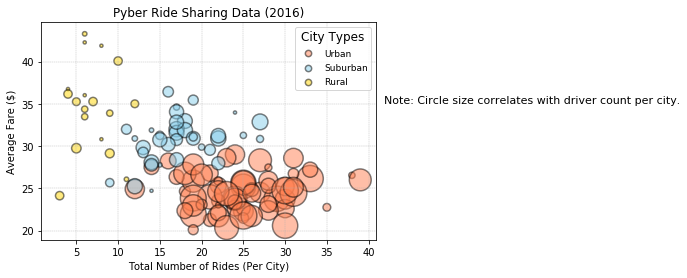

In [247]:
#type of city into individual type variables
urban_df = combined_data_df.loc[combined_data_df["type"] == "Urban"]
suburban_df = combined_data_df.loc[combined_data_df["type"] == "Suburban"]
rural_df = combined_data_df.loc[combined_data_df["type"] == "Rural"]


#Number of rides per city per type
rides_per_city_urban = urban_df.groupby('city')
count_rides_per_city_urban = rides_per_city_urban['city'].count()

rides_per_city_suburban = suburban_df.groupby('city')
count_rides_per_city_suburban = rides_per_city_suburban['city'].count()

rides_per_city_rural = rural_df.groupby('city')
count_rides_per_city_rural = rides_per_city_rural['city'].count()


#FIND THE AVG FARE
avg_fare_per_city_urban = rides_per_city_urban['fare'].mean()

avg_fare_per_city_suburban = rides_per_city_suburban['fare'].mean()

avg_fare_per_city_rural = rides_per_city_rural['fare'].mean()


#FIND THE DRIVER COUNT PER CITY FOR CIRCLE SIZES
driver_count_per_city_group = urban_df.groupby('city')
driver_count_per_city = driver_count_per_city_group['driver_count'].mean()
urban_area_size=driver_count_per_city

driver_count_per_city_group = suburban_df.groupby('city')
driver_count_per_city = driver_count_per_city_group['driver_count'].mean()
suburban_area_size=driver_count_per_city

driver_count_per_city_group = rural_df.groupby('city')
driver_count_per_city = driver_count_per_city_group['driver_count'].mean()
rural_area_size=driver_count_per_city


#build the scatter plots for each city type
legend_urban=plt.scatter(count_rides_per_city_urban, avg_fare_per_city_urban, urban_area_size*10, 
                        alpha=0.5, edgecolors="black", linewidth=1.5, color='coral')
legend_suburban=plt.scatter(count_rides_per_city_suburban, avg_fare_per_city_suburban, suburban_area_size*10, 
                        alpha=0.5, edgecolors="black", linewidth=1.5, color='skyblue')
legend_rural=plt.scatter(count_rides_per_city_rural, avg_fare_per_city_rural, rural_area_size*10, 
                        alpha=0.5, edgecolors="black", linewidth=1.5, color='gold')


# CREATE A LEGEND
legend = plt.legend((legend_urban, legend_suburban, legend_rural), ("Urban", "Suburban", "Rural"), 
   scatterpoints=1, loc='best', frameon=True, labelspacing=.6, title='City Types', 
           title_fontsize=12, fontsize=9)

legend.legendHandles[0]._sizes = [40]
legend.legendHandles[1]._sizes = [40]
legend.legendHandles[2]._sizes = [40]

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(linestyle='--', linewidth='.4')


# Incorporate a text label regarding circle size
plt.text(.92, 0.6, "Note: Circle size correlates with driver count per city.", fontsize=11, transform=plt.gcf().transFigure)


# Save Figure 
plt.savefig("C:/Users/bross/Downloads/Week_5_Matplotlib_homework/Pyber_Bubble_Plot")

plt.show


# Total Fares by City Type

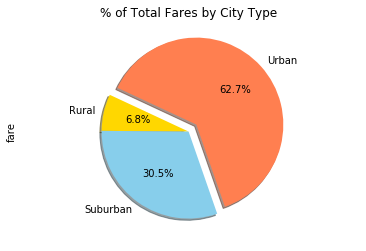

In [248]:
# Total Fares by City Type

# Calculate Type Percents
city_type_groups = combined_data_df.groupby('type')
fares_per_city_type = city_type_groups['fare'].sum()
fares_per_city_type

# Build Pie Chart
plt.axis("equal")
plt.title("% of Total Fares by City Type")

fares_pie = fares_per_city_type.plot(kind="pie", explode=(0, 0, 0.12,), 
                            autopct="%1.1f%%", shadow=True, 
                            startangle=155, colors=['gold','skyblue','coral'])





# Save Figure
plt.savefig("C:/Users/bross/Downloads/Week_5_Matplotlib_homework/Pyber_TotalFares_Pie")


plt.show(fares_pie)

# Total Rides by City Type

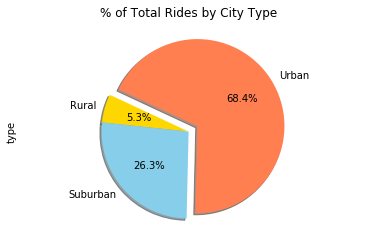

In [249]:
# Total Rides by City Type

# Calculate Ride Percents
city_type_groups = combined_data_df.groupby('type')
rides_per_city_type = city_type_groups['type'].count()
rides_per_city_type

# Build Pie Chart
plt.axis("equal")
plt.title("% of Total Rides by City Type")

rides_per_city_type_pie = rides_per_city_type.plot(kind="pie", 
                            explode=(0, 0, 0.12,), autopct="%1.1f%%", shadow=True, 
                            startangle=155, colors=['gold','skyblue','coral'])

# Save Figure
plt.savefig("C:/Users/bross/Downloads/Week_5_Matplotlib_homework/Pyber_TotalRides_Pie")

# Show Figure
plt.show()



# Total Drivers by City Type

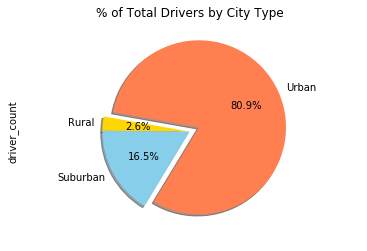

In [250]:
# Total Drivers by City Type

# Calculate Driver Percents
driver_count_per_city_type = city_data_df.groupby('type')
sum_driver_count_per_city_type = driver_count_per_city_type['driver_count'].sum()

sum_driver_count_per_city_type

   
# Build Pie Charts
plt.axis("equal")
plt.title("% of Total Drivers by City Type")

driver_count_per_city_type_pie = sum_driver_count_per_city_type.plot(kind="pie", 
                            explode=(0, 0, 0.12,), autopct="%1.1f%%", shadow=True, 
                            startangle=170, colors=['gold','skyblue','coral'])


# Save Figure
plt.savefig("C:/Users/bross/Downloads/Week_5_Matplotlib_homework/Pyber_TotalDrivers_Pie")

# Show Figure
plt.show()